[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# LSTM
This is a LSTM model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models

LSTM model has analogous hyperparameters to NP:
* n_lags: defines the sequence length
* n_forecasts: defines how many timestamps in the future we predict
* num_hidden_layers: number of layers in LSTM
* d_hidden: dimension of hidden layers in LSTM

It shares the training configuration parameters with NP.

It also includes additional LSTM-specific parameters:
* lstm_bias = True,  If False, then the layer does not use bias weights b_ih and b_hh. Default: True
* lstm_biderectional = False, If True, becomes a bidirectional LSTM. Default: False

In [1]:
import pandas as pd
import numpy as np
from neuralprophet.forecaster_additional_models import LSTM

In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8


In [4]:
m = LSTM(n_lags = 10,
            n_forecasts=3,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_bidirectional = False)

In [5]:
metrics_df = m.fit(df.iloc[:-10], freq = '5min', validate_each_epoch=True)

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
  0%|          | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 19.5 K
1 | linear    | Linear       | 195   
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
19.7 K    Trainable params
0         Non-trainable params
19.7 K    Total params
0.079     Total est

Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [6]:
metrics_df

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,0.013368,5.313629,72.593416,0.261260,34.882860,1427.441650
1,0.000971,1.668004,5.272693,0.001426,1.913966,7.740492
2,0.000820,1.507601,4.452123,0.001150,1.740845,6.244589
3,0.000697,1.384448,3.783430,0.000888,1.595560,4.821377
4,0.000580,1.256087,3.149908,0.000730,1.401609,3.962099
5,0.000450,1.086383,2.445073,0.000534,1.206666,2.897420
6,0.000344,0.921565,1.869899,0.000342,0.958671,1.856975
7,0.000284,0.783148,1.540698,0.000205,0.773874,1.112570
8,0.000267,0.735617,1.447041,0.000156,0.672853,0.848039
9,0.000256,0.696279,1.389747,0.000126,0.634048,0.684187


In [7]:
metrics = m.test(df.iloc[:-10])

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Testing: 0it [00:00, ?it/s]

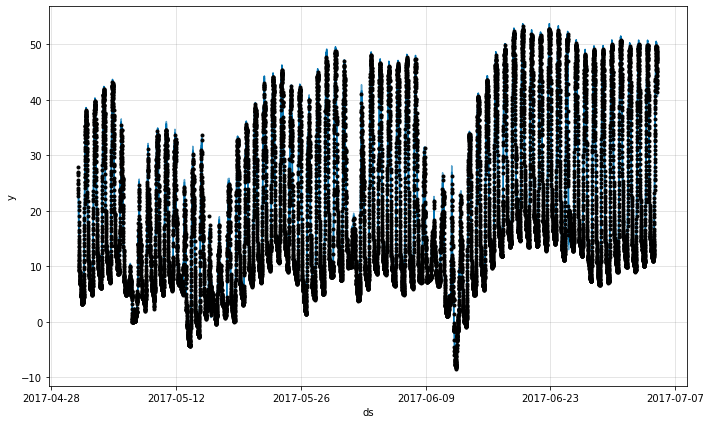

In [8]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

## Multioutput forecasting plotting

In [9]:
m = LSTM(n_lags=6*12,
            n_forecasts=3*12,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_bidirectional = False)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
  0%|          | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 35.3 K
1 | linear    | Linear       | 2.3 K 
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
37.7 K    Trainable params
0         Non-trainable params
37.7 K    Total params
0.151     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Training: 0it [00:00, ?it/s]

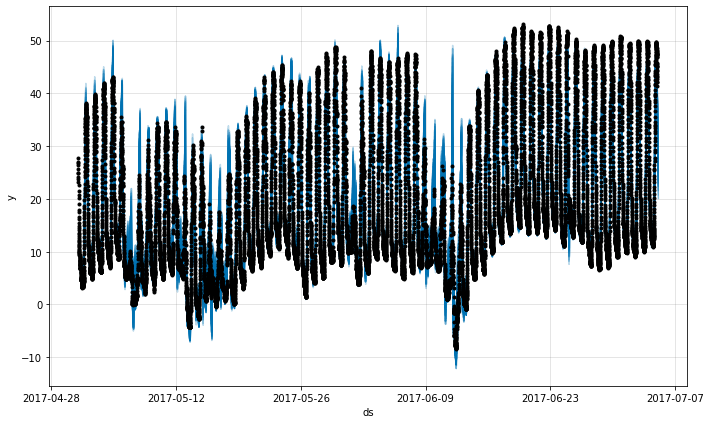

In [10]:
metrics = m.fit(df, freq='5min')
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

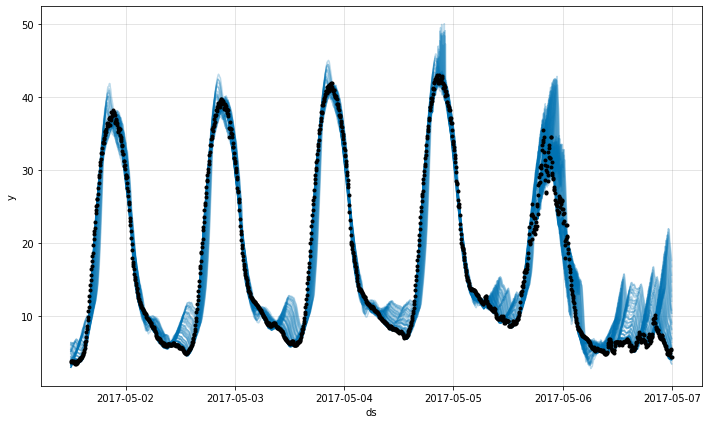

In [11]:
fig = m.plot(forecast[144:6*288])